[**Demo %s**](#demo-matrixfree-blur)

We use a readily available test image.

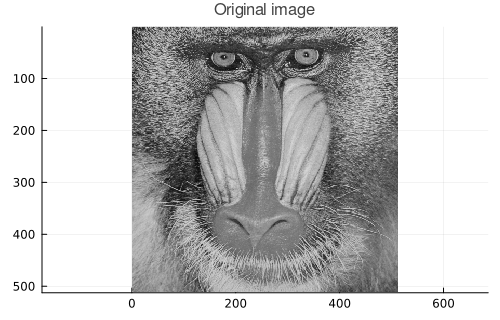

In [2]:
using Images, TestImages
img = testimage("mandrill")
m, n = size(img)
X = @. Float64(Gray(img))
plot(Gray.(X), title="Original image", aspect_ratio=1)

We define the one-dimensional tridiagonal blurring matrices.

In [3]:
using SparseArrays
function blurmatrix(d)
    v1 = fill(0.25, d - 1)
    return spdiagm(0 => fill(0.5, d), 1 => v1, -1 => v1)
end
B, C = blurmatrix(m), blurmatrix(n);

Finally, we show the results of using $k=12$ repetitions of the blur in each direction.

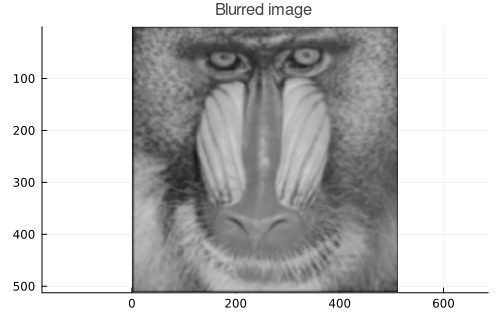

In [4]:
blur = X -> B^12 * X * C^12;
Z = blur(X)
plot(Gray.(Z), title="Blurred image")